# Project: Wrangling and Analyze Data

# Temitope Ige

# JUNE 2022


Table-of-Contents

Introduction

Gather Data

    Enhanced Twitter Archive
    Image Predictions File
    Download Tweet JSON Data

Assess Data

    Archive
    Predictions
    JSON Data

Assessment Summary

Clean Data

Analyze Data


Introduction

The "We Rate Dogs" Twitter archive contains 5000+ tweets, which have been filtered to create the enhanced twitter archive that forms the basis of this analysis. There's also the image predictions file and JSON text file. The goal of this project is to wrangle the data through the gather, assess, and clean processes into a tidy dataset, and then provide analysis and visualizations.

IMPORT THE NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import time
import datetime
import random
from tweepy import OAuthHandler
from timeit import default_timer as timer
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

Gather Data
1. Enhanced Twitter Archive - 'twitter-archive-enhanced.csv'
The WeRateDogs Twitter archive is provided and is downloaded manually from the Udacity server.

In [2]:
# set the option to display the full string from a pandas DataFrame
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)

In [3]:
# load the twitter archive file into a DataFrame
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [4]:
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None



Sample Of Tweet Data

Let's take a look at a sample of one of the tweets, with additional output to display the entire field's data.


In [5]:
sample_of_tweet = twitter_archive_df.iloc[4]
sample_of_tweet

tweet_id                      891327558926688256                                                                                                                                                
in_reply_to_status_id         NaN                                                                                                                                                               
in_reply_to_user_id           NaN                                                                                                                                                               
timestamp                     2017-07-29 16:00:24 +0000                                                                                                                                         
source                        <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                                                
text                          This 

In [6]:
sample_of_tweet.text

'This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f'

In [7]:
sample_of_tweet.source

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [8]:
sample_of_tweet.expanded_urls

'https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1'

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [9]:
# download the image predictions file with the provided link
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [10]:
#  HTTP status code 200 indicates the request has succeeded 
file_images = url.split('/')[-1]

with open(os.path.join('./', file_images), mode = 'wb') as file:
    file.write(response.content)

In [11]:
ls *.tsv

image-predictions.tsv


In [12]:
# read image predictions file into a DataFrame
df_image_predictions = pd.read_csv(file_images, sep = '\\t', engine = 'python')
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
# check one observation
df_image_predictions.iloc[3]

tweet_id    666044226329800704                             
jpg_url     https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg
img_num     1                                              
p1          Rhodesian_ridgeback                            
p1_conf     0.408143                                       
p1_dog      True                                           
p2          redbone                                        
p2_conf     0.360687                                       
p2_dog      True                                           
p3          miniature_pinscher                             
p3_conf     0.222752                                       
p3_dog      True                                           
Name: 3, dtype: object


3. DOWNLOAD TWEET JSON DATA

Query the Twitter API using Python's Tweepy library to get the entire set of JSON data for each of the tweets in the WeRateDogs Twitter archive. Each tweet's JSON data is written to its own line in a file called tweet_json.txt file.
My twitter developer's account has not been granted access, so I am using the alternative method in this step.



In [15]:
import requests
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
r = requests.get(url, allow_redirects=True)

In [16]:
open('tweet-json.txt', 'wb').write(r.content)

10609234

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [17]:
df = []
with open('tweet-json.txt') as f:
    for line in f:
        tweet = (json.loads(line))
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        create_date = tweet['created_at']
        df.append({'retweet_count' : retweet_count,
                  'favorite_count' : favorite_count,
                  'create_date' : create_date,
                  'tweet_id' : tweet_id})
        
more_data = pd.DataFrame(df, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'create_date'])

In [18]:
more_data.head(10)

,tweet_id,retweet_count,favorite_count,create_date
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017
5,891087950875897856,3261,20562,Sat Jul 29 00:08:17 +0000 2017
6,890971913173991426,2158,12041,Fri Jul 28 16:27:12 +0000 2017
7,890729181411237888,16716,56848,Fri Jul 28 00:22:40 +0000 2017
8,890609185150312448,4429,28226,Thu Jul 27 16:25:51 +0000 2017
9,890240255349198849,7711,32467,Wed Jul 26 15:59:51 +0000 2017


In [19]:
more_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
create_date       2354 non-null object
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [20]:
more_data.to_csv('tweet_data_extra.csv', index = False)

Assess Data

In this section I assess the data that was gathered, both visually and programmatically for quality and tidiness issues. One of the key points for the analysis requires that only tweets with original ratings with images, no retweets, be retained.

The quality of data is assessed against dimensions such as the completeness, validity, accuracy and consistency.

Tidiness of data is assessed with regard to structure.

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [21]:
# Load the three gathered data files
archive = pd.read_csv('twitter-archive-enhanced.csv')
predictions = pd.read_csv('image-predictions.tsv', sep = '\\t', engine = 'python')
json_data = pd.read_csv('tweet_data_extra.csv')

ARCHIVE



In [22]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

OBSERVATIONS

The info() method reveals several quality and tidiness issues in this dataset,

There are 181 retweets (retweeted_status_id, retweeted_status_user_id, retweeted_status_times     There are 78 replies (in_reply_to_status_id, in_reply_to_user_id)
There are 2297 tweets with expanded_urls (links to images) indicating 59 tweets with missing data
There are 4 columns for dog stages (doggo, floofer, pupper, puppo)
The columns related to replies are not applicable for original tweets
The columns related to retweets are not applicable for original tweets
The timestamp field is in string format (object)

In [23]:
print("Data type for timestamp:  " + str(type(archive.timestamp[0])))

Data type for timestamp:  <class 'str'>


In [24]:
print("Duplicated:  {}".format(sum(archive.duplicated())))

Duplicated:  0


In [25]:
archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [26]:
archive.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600524156928/photo/1,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090499244032/photo/1,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525042405380/photo/1,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758794694657/photo/1,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twi

The head() and tail() methods show us several issues:

Quality: The timestamp column has dates in string form.Some of the rows from the tail() output above have invalid strings in the name column, e.g. "a", "an", "in". These words are all the 3rd word in the tweet.
Values of "None" in the name column.

Tidiness: The columns with numerical data that are typically used for analysis are located to the far right of the table, and the columns with long strings are on the left; this makes it difficult to readily see the data that will be used for analyses.



In [27]:
#check the name column, starting with value counts.
archive.name.value_counts().head(50)

None        745
a           55 
Charlie     12 
Oliver      11 
Lucy        11 
Cooper      11 
Tucker      10 
Penny       10 
Lola        10 
Bo          9  
Winston     9  
Sadie       8  
the         8  
an          7  
Bailey      7  
Toby        7  
Daisy       7  
Buddy       7  
Dave        6  
Jack        6  
Milo        6  
Rusty       6  
Leo         6  
Stanley     6  
Jax         6  
Koda        6  
Oscar       6  
Bella       6  
Scout       6  
Larry       5  
very        5  
Oakley      5  
Louis       5  
Alfie       5  
Gus         5  
Finn        5  
Bentley     5  
George      5  
Phil        5  
Chester     5  
Sunny       5  
Sammy       5  
Reginald    4  
Archie      4  
Jeffrey     4  
Bruce       4  
Bear        4  
Chip        4  
Hank        4  
Beau        4  
Name: name, dtype: int64

Note: It looks like the dog names are all capitalized, so words that begin in lowercase are probably not names, like "a", "the" and "an". Here's the list of these "names".

In [28]:
# list all names that are NOT capitalized
names_not = archive.name.str.contains('^[a-z]', regex = True)
archive[names_not].name.value_counts().sort_index()

a               55
actually        2 
all             1 
an              7 
by              1 
getting         2 
his             1 
incredibly      1 
infuriating     1 
just            4 
life            1 
light           1 
mad             2 
my              1 
not             2 
officially      1 
old             1 
one             4 
quite           4 
space           1 
such            1 
the             8 
this            1 
unacceptable    1 
very            5 
Name: name, dtype: int64

In [29]:
len(archive[names_not])

109

NOTES:
This list contains non-capitalized words from the name column for 109 tweets, which are not a valid name.


Let's check the tweets that are missing data in expanded_urls, are they replies or retweets?


In [30]:
# number of tweets with missing urls
sum(archive.expanded_urls.isna())

59

In [31]:
# how many tweets with missing urls are replies or retweets?
sum(archive.expanded_urls.isna() & \
    (archive.in_reply_to_status_id.notnull() | \
     archive.retweeted_status_id.notnull()))

56

In [32]:
# display tweets that are missing urls, and are NOT replies and are NOT retweets
tweet_not = archive.expanded_urls.isna() & \
       archive.in_reply_to_status_id.isna() & \
       archive.retweeted_status_id.isna()
archive[tweet_not][['tweet_id', 'text', 'expanded_urls']]

,tweet_id,text,expanded_urls
375,828361771580813312,Beebop and Doobert should start a band 12/10 would listen,NaN
707,785515384317313025,"Today, 10/10, should be National Dog Rates Day",NaN
1445,696518437233913856,Oh my god 10/10 for every little hot dog pupper,NaN


NOTES: Out Of the 59 tweets that are missing data in expanded_urls column, 56 are replies or retweets. The remaining 3 tweets (at indexes 375, 707 and 1445) are exceptions.

Let's check whether these tweets are part of the predictions or json_data tables.

In [33]:
# are any of these tweets in the predictions table?
these_tweet_set = [828361771580813312, 785515384317313025, 696518437233913856]
find_these_tweet_id = predictions.tweet_id.isin(these_tweet_set)
sum(find_these_tweet_id)

0

In [34]:
# are any of these tweets in the json_data table?
these_tweet_set = [828361771580813312, 785515384317313025, 696518437233913856]
find_these_tweet_id = json_data.tweet_id.isin(these_tweet_set)
json_data[find_these_tweet_id]

,tweet_id,retweet_count,favorite_count,create_date
374,828361771580813312,195,2408,Sun Feb 05 21:56:51 +0000 2017
706,785515384317313025,1477,6800,Mon Oct 10 16:20:36 +0000 2016
1443,696518437233913856,1887,4274,Mon Feb 08 02:18:30 +0000 2016


NOTES: The 3 tweets set are not in the predictions table, although they are in the json_data table, there was NO image url extracted from the JSON data.


IMAGE PREDICTIONS FILE

In [35]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [36]:
predictions.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [37]:
predictions.p1_dog.value_counts()

True     1532
False    543 
Name: p1_dog, dtype: int64

In [38]:
predictions.p2_dog.value_counts()

True     1553
False    522 
Name: p2_dog, dtype: int64

In [39]:
predictions.p3_dog.value_counts()

True     1499
False    576 
Name: p3_dog, dtype: int64

In [40]:
# check out the entries that don't predict dogs
sum(~predictions.p1_dog & \
    ~predictions.p2_dog & \
    ~predictions.p3_dog)

324

Notes: There are 324 cases where there is no valid dog breed from any of the three predictions.

JSON_DATA FILE

In [41]:
json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
create_date       2354 non-null object
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [42]:
json_data.head(20)

,tweet_id,retweet_count,favorite_count,create_date
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017
5,891087950875897856,3261,20562,Sat Jul 29 00:08:17 +0000 2017
6,890971913173991426,2158,12041,Fri Jul 28 16:27:12 +0000 2017
7,890729181411237888,16716,56848,Fri Jul 28 00:22:40 +0000 2017
8,890609185150312448,4429,28226,Thu Jul 27 16:25:51 +0000 2017
9,890240255349198849,7711,32467,Wed Jul 26 15:59:51 +0000 2017


In [43]:
json_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


ASSESSMENT SUMMARY

ARCHIVE FILE QUALITY ISSUES

1. There are 181 retweets (retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp).

2. There are 2297 tweets with expanded_urls,this means that 59 tweets have the missing data.56 of them are either replies or retweets.The remaining 3 tweets do not have the url within the text column. They are not in the predictions table, but even though they are in the json_data, there was no image url in the JSON data.

3. The timestamp column is in a string format.

4. There are 78 reply tweets (in_reply_to_status_id, in_reply_to_user_id).

5. There are 109 tweets with regular words in the name column that are not a valid name. these words are all lowercase; all valid names start with an uppercase letter.

6. There are 775 tweets with the dog name as "None". (This will not be cleaned.)

PREDICTIONS FILE QUALITY

7. There are 2075 image predictions, that means that we have 281 less than the number of tweets in the archive file, so this will be classified as "missing data".

JSON DATA FILE

8. Quite a number of  tweets (16 during this run) from the original archive table have been deleted since the archive was created.

TIDINESS ISSUES

ARCHIVE

1.We are just interested in “original tweets”, no “retweets”; this data is stored in the columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp. Reply tweets are also not “original tweets”, this data is stored in the columns in_reply_to_status_id, in_reply_to_user_id.

2.Columns with numerical data are located to the far right of the table, it will be difficult to quickly see the data that will be used for analyses.

PREDICTIONS

3. The dog breed prediction with the highest confidence level will be combined with the archive table because it contains information that is all about the dog in the tweet.

JSON_DATA

4. The json_data table will be combined with the archive table.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [44]:
# Make copies of original pieces of data
archive_clean = archive.copy()
predictions_clean = predictions.copy()
json_data_clean = json_data.copy()

In [45]:
archive_file_len = archive_clean.shape[0]; archive_file_len

2356

### Issue #1: ARCHIVE FILE QUALITY (1)

There are 181 retweets, and we’re only interested in “original tweets”.

#### Define: Drop all rows containing retweets, the rows where these three columns will be non-null: retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp.

#### Code

In [46]:
print("number of retweets:  {}".format(sum(archive_clean.retweeted_status_id.notnull())))

number of retweets:  181


In [47]:
df_archive_clean = archive_clean[archive_clean.retweeted_status_id.isna()]

#### Test

In [48]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [49]:
#To confirm the rows were dropped, let's compare the new df table length with original table length
print("Total numbers of rows dropped are:  {}".format(archive_clean.shape[0] - df_archive_clean.shape[0]))
# reset the variable for length of the archive
len_archive = archive_clean.shape[0]

Total numbers of rows dropped are:  181


### Issue #2: ARCHIVE FILE QUALITY

#### Define: There are 78 reply tweets in the dataframe but we are only interested in “original tweets”. Drop all rows that are replies, that is those that have non-null values in these columns: in_reply_to_status_id and in_reply_to_user_id.

#### Code

In [50]:
print("The total number of replies are:  {}".format(sum(archive_clean.in_reply_to_status_id.notnull())))

The total number of replies are:  78


In [51]:
df_archive_clean = df_archive_clean[archive_clean.in_reply_to_status_id.isna()]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


#### Test

In [52]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

In [53]:
# Time to confirm that the rows were dropped by comparing with previous table length
print("Total number of rows dropped are:  {}".format(len_archive - df_archive_clean.shape[0]))
# reset the variable for length of the archive
len_archive = df_archive_clean.shape[0]

Total number of rows dropped are:  259


# Issue #3: ARCHIVE FILE QUALITY¶

DEFINE: The timestamp column is in string format, let's convert timestamp to datetime data type.

In [54]:
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean.timestamp)
df_archive_clean['timestamp'] = df_archive_clean.timestamp.dt.floor('s')

TEST

In [55]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), float

# Issue #4: ARCHIVE FILE QUALITY

DEFINE: Some tweets have rating_denominator that are not equal to 10,some have multiple dogs and some have invalid ratings. let's drop the tweets with rating_denominator values that are not equal to 10.

In [56]:
# show available denominators
df_archive_clean.rating_denominator.value_counts().sort_index(ascending = False)

170    1   
150    1   
120    1   
110    1   
90     1   
80     2   
70     1   
50     3   
40     1   
20     1   
11     2   
10     2080
7      1   
2      1   
Name: rating_denominator, dtype: int64

In [57]:
df_archive_clean = df_archive_clean[df_archive_clean.rating_denominator == 10]

TEST

In [58]:
# we want to recheck the values in the column, we should have only  "10" as rating denominators.
df_archive_clean.rating_denominator.value_counts().sort_index(ascending = False)

10    2080
Name: rating_denominator, dtype: int64

# Issue #5: ARCHIVE FILE QUALITY

DEFINE: Tweets with missing data in expanded_urls. we want to drop tweets with missing data in the expanded_urls.

In [59]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2080 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2080 non-null datetime64[ns]
source                        2080 non-null object
text                          2080 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2077 non-null object
rating_numerator              2080 non-null int64
rating_denominator            2080 non-null int64
name                          2080 non-null object
doggo                         2080 non-null object
floofer                       2080 non-null object
pupper                        2080 non-null object
puppo                         2080 non-null object
dtypes: datetime64[ns](1), float

In [60]:
df_archive_clean = df_archive_clean[df_archive_clean.expanded_urls.notnull()]

TEST

In [61]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2077 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2077 non-null datetime64[ns]
source                        2077 non-null object
text                          2077 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2077 non-null object
rating_numerator              2077 non-null int64
rating_denominator            2077 non-null int64
name                          2077 non-null object
doggo                         2077 non-null object
floofer                       2077 non-null object
pupper                        2077 non-null object
puppo                         2077 non-null object
dtypes: datetime64[ns](1), float

# Issue #6: ARCHIVE FILE QUALITY

DEFINE: I observed that there are some tweets in the name column with invalid names. let's replace all lowercase words in the name column with the string "none".

CODE

In [62]:
invalid_names = df_archive_clean.name.str.contains('^[a-z]', regex = True)
df_archive_clean[invalid_names].name.value_counts().sort_index()

a               54
actually        2 
all             1 
an              5 
by              1 
getting         2 
his             1 
incredibly      1 
infuriating     1 
just            3 
life            1 
light           1 
mad             1 
my              1 
not             2 
officially      1 
old             1 
one             4 
quite           3 
space           1 
such            1 
the             8 
unacceptable    1 
very            4 
Name: name, dtype: int64

In [63]:
df_archive_clean.loc[invalid_names, 'name'] = "none"

TEST

In [64]:
# All these entries were changed to "none"
df_archive_clean[invalid_names].name.value_counts().sort_index()

none    101
Name: name, dtype: int64

# Issue 7 & 8: JSON_DATA FILE QUALITY AND TIDINESS

DEFINE

Merge the retweet_count and favorite_count columns to the archive table, joining on tweet_id.

In [65]:
json_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
create_date       2354 non-null object
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [66]:
df_archive_clean = pd.merge(df_archive_clean, json_data_clean, on = 'tweet_id', how = 'left')

TEST

In [67]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2076
Data columns (total 20 columns):
tweet_id                      2077 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2077 non-null datetime64[ns]
source                        2077 non-null object
text                          2077 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2077 non-null object
rating_numerator              2077 non-null int64
rating_denominator            2077 non-null int64
name                          2077 non-null object
doggo                         2077 non-null object
floofer                       2077 non-null object
pupper                        2077 non-null object
puppo                         2077 non-null object
retweet_count                 20

# Issue 7 & 8:  PREDICTIONS TIDINESS

DEFINE

The best dog breed prediction and the associated confidence level should be merged with the tweet archive table because they provide additional data about the dogs.

NOTE: We only need tweets that have images.

CODE

Firstly, let's create the columns in the predictions table, then merge it to the tweet archive file.

Two new columns in predictions called dog_breed and confidence_level will be created and then we check each dog breed prediction flag in order (p1_dog, p2_dog, p3_dog), and copy the breed with the highest confidence level into the breed column.

Copy the associated confidence level into the new confidence column. When all the 3 prediction flags are False (meaning it is not a valid dog breed), we set breed as 'none' and confidence to 0.

In [68]:
# The conditions for selection
conditions = [(predictions_clean['p1_dog'] == True),
              (predictions_clean['p2_dog'] == True),
              (predictions_clean['p3_dog'] == True)]

In [69]:
# set the choice order using the selection conditions for predicted breed
choices_breed = [predictions_clean['p1'], 
                 predictions_clean['p2'],
                 predictions_clean['p3']]

In [70]:
# set the choice order for confidence level using the selection conditions
choices_confidence = [predictions_clean['p1_conf'], 
                      predictions_clean['p2_conf'], 
                      predictions_clean['p3_conf']]

In [71]:
# select the predicted breed based on the first successful condition
predictions_clean['breed'] = np.select(conditions, choices_breed, 
                                       default = 'none')

In [72]:
# select the predicted confidence level based on the first successful condition
predictions_clean['confidence'] = np.select(conditions, choices_confidence, 
                                            default = 0)

TEST

In [73]:
predictions_clean.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,Bernese_mountain_dog,0.651137
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,none,0.000000
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,golden_retriever,0.007959
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,miniature_poodle,0.201493


In [74]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2076
Data columns (total 20 columns):
tweet_id                      2077 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2077 non-null datetime64[ns]
source                        2077 non-null object
text                          2077 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2077 non-null object
rating_numerator              2077 non-null int64
rating_denominator            2077 non-null int64
name                          2077 non-null object
doggo                         2077 non-null object
floofer                       2077 non-null object
pupper                        2077 non-null object
puppo                         2077 non-null object
retweet_count                 20

In [75]:
# merge both the breed and confidence columns to archive
new_cols = ['tweet_id', 'breed', 'confidence']
df_archive_clean = pd.merge(df_archive_clean, predictions_clean[new_cols],
                         on = 'tweet_id', how = 'inner')

In [76]:
# change data type for the confidence interval to a rounded, whole integer (%)
df_archive_clean.confidence = (df_archive_clean.confidence * 100).astype(int)

In [77]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1954 entries, 0 to 1953
Data columns (total 22 columns):
tweet_id                      1954 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1954 non-null datetime64[ns]
source                        1954 non-null object
text                          1954 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1954 non-null object
rating_numerator              1954 non-null int64
rating_denominator            1954 non-null int64
name                          1954 non-null object
doggo                         1954 non-null object
floofer                       1954 non-null object
pupper                        1954 non-null object
puppo                         1954 non-null object
retweet_count                 19

In [78]:
df_archive_clean.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,create_date,breed,confidence
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,Phineas,None,None,None,None,8853,39467,Tue Aug 01 16:23:56 +0000 2017,none,0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,Tilly,None,None,None,None,6514,33819,Tue Aug 01 00:17:27 +0000 2017,Chihuahua,32
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,Archie,None,None,None,None,4328,25461,Mon Jul 31 00:18:03 +0000 2017,Chihuahua,71
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,Darla,None,None,None,None,8964,42908,Sun Jul 30 15:58:51 +0000 2017,Labrador_retriever,16
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,Franklin,None,None,None,None,9774,41048,Sat Jul 29 16:00:24 +0000 2017,basset,55
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,...,None,None,None,None,None,3261,20562,Sat Jul 29 00:08:17 +0000 2017,Chesapeake_Bay_retriever,42
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",...,Jax,None,None,None,None,2158,12041,Fri Jul 28 16:27:12 +0000 2017,Appenzeller,34
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",...,None,None,None,None,None,16716,56848,Fri Jul 28 00:22:40 +0000 2017,Pome

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [79]:
df_archive_clean.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

The cleaned data from the previous section will be used in this section. The variables that I am focusing on are retweet_count, favorite_count and breed.

In [80]:
# Set default display parameter for plots.
plt.rcParams['figure.figsize'] = (8, 5)

In [81]:
# make a copy of the dataset for analysis
final_dogs_file = df_archive_clean.copy()
final_dogs_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1954 entries, 0 to 1953
Data columns (total 22 columns):
tweet_id                      1954 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1954 non-null datetime64[ns]
source                        1954 non-null object
text                          1954 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1954 non-null object
rating_numerator              1954 non-null int64
rating_denominator            1954 non-null int64
name                          1954 non-null object
doggo                         1954 non-null object
floofer                       1954 non-null object
pupper                        1954 non-null object
puppo                         1954 non-null object
retweet_count                 19

STATISTICS

In [82]:
final_dogs_file[[ 'retweet_count', 'favorite_count', 'confidence']].describe()

,retweet_count,favorite_count,confidence
count,1954.000000,1954.000000,1954.000000
mean,2785.858751,8971.329069,46.095189
std,4705.353047,12302.225779,33.838449
min,16.000000,81.000000,0.000000
25%,624.750000,1960.500000,14.000000
50%,1366.500000,4148.000000,45.500000
75%,3243.000000,11414.750000,77.000000
max,79515.000000,132810.000000,99.000000


WHICH TOP 10 TWEETS ARE THE MOST FAVOURITED?

In [83]:
final_dogs_file.sort_values(by = 'favorite_count', ascending = False).head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,create_date,breed,confidence
306,822872901745569793,NaN,NaN,2017-01-21 18:26:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/822872901745569793/photo/1,...,None,None,None,None,puppo,48265,132810,Sat Jan 21 18:26:02 +0000 2017,Lakeland_terrier,19
766,744234799360020481,NaN,NaN,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744234799360020481/video/1,...,None,doggo,None,None,None,79515,131075,Sat Jun 18 18:26:18 +0000 2016,Labrador_retriever,82
58,879415818425184262,NaN,NaN,2017-06-26 19:07:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879415818425184262/video/1,...,Duddles,None,None,None,None,45849,107956,Mon Jun 26 19:07:24 +0000 2017,English_springer,38
395,807106840509214720,NaN,NaN,2016-12-09 06:17:20,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,NaN,NaN,NaN,https://twitter.com/dog_rates/status/807106840509214720/video/1,...,Stephan,None,None,None,None,56625,107015,Fri Dec 09 06:17:20 +0000 2016,Chihuahua,50
108,866450705531457537,NaN,NaN,2017-05-22 00:28:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/866450705531457537/photo/1,https://twitter.com/dog_rates/status/866450705531457537/photo/1",...,Jamesy,None,None,pupper,None,32883,106827,Mon May 22 00:28:40 +0000 2017,French_bulldog,90
329,819004803107983360,NaN,NaN,2017-01-11 02:15:36,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1",...,Bo,doggo,None,None,None,42228,95450,Wed Jan 11 02:15:36 +0000 2017,standard_poodle,35
93,870374049280663552,NaN,NaN,2017-06-01 20:18:38,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She really likes the planet. Would hate to see willful ignorance and the denial of fairly elemental science destroy it. 13/10 https://t.co/T1xlgaPujm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/870374049280663552/photo/1,...,Zoey,None,None,None,None,27680,85011,Thu Jun 01 20:18:38 +0000 2017,golden_retriever,84
397,806629075125202948,NaN,NaN,2016-12-07 22:38:52,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Good afternoon class today we're going to learn what makes a good boy so good"" 13/10 https://t.co/f1h2Fsalv9",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/806629075125202948/photo/1,https://twitter.com/dog_rates/status/806629075125202948/photo/1",...,None,None,None,None,None,37911,75639,Wed Dec 07 22:38:52 +0000 2016,cocker_spaniel,4
134,8591969789

THE TOP 10 MOST RETWEETED TWEETS ARE?

In [84]:
final_dogs_file.sort_values(by = 'retweet_count', ascending = False).head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,create_date,breed,confidence
766,744234799360020481,NaN,NaN,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744234799360020481/video/1,...,None,doggo,None,None,None,79515,131075,Sat Jun 18 18:26:18 +0000 2016,Labrador_retriever,82
395,807106840509214720,NaN,NaN,2016-12-09 06:17:20,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,NaN,NaN,NaN,https://twitter.com/dog_rates/status/807106840509214720/video/1,...,Stephan,None,None,None,None,56625,107015,Fri Dec 09 06:17:20 +0000 2016,Chihuahua,50
800,739238157791694849,NaN,NaN,2016-06-04 23:31:25,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/739238157791694849/video/1,...,None,doggo,None,None,None,52360,75163,Sat Jun 04 23:31:25 +0000 2016,Eskimo_dog,50
306,822872901745569793,NaN,NaN,2017-01-21 18:26:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/822872901745569793/photo/1,...,None,None,None,None,puppo,48265,132810,Sat Jan 21 18:26:02 +0000 2017,Lakeland_terrier,19
58,879415818425184262,NaN,NaN,2017-06-26 19:07:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/879415818425184262/video/1,...,Duddles,None,None,None,None,45849,107956,Mon Jun 26 19:07:24 +0000 2017,English_springer,38
329,819004803107983360,NaN,NaN,2017-01-11 02:15:36,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1",...,Bo,doggo,None,None,None,42228,95450,Wed Jan 11 02:15:36 +0000 2017,standard_poodle,35
397,806629075125202948,NaN,NaN,2016-12-07 22:38:52,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Good afternoon class today we're going to learn what makes a good boy so good"" 13/10 https://t.co/f1h2Fsalv9",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/806629075125202948/photo/1,https://twitter.com/dog_rates/status/806629075125202948/photo/1",...,None,None,None,None,None,37911,75639,Wed Dec 07 22:38:52 +0000 2016,cocker_spaniel,4
631,761672994376806400,NaN,NaN,2016-08-05 21:19:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Ohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboy. 10/10 for all (by happytailsresort) https://t.co/EY8kEFuzK7,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761672994376806400/video/1,...,None,None,None,None,None,33421,55016,Fri Aug 05 21:19:27 +0000 2016,none,0
108,866450705531457537,NaN,NaN,2017-05-22 00:28:40,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitt

WHAT ARE THE TOP 10 MOST COMMON BREED OF DOGS IN THE TWEETS? EXCLUDING THE NONE CATEGORY.

In [85]:
none_breed = "Number of tweets with 'none' predicted breed:  {} ({}%)"
none_count = sum(final_dogs_file.breed == 'none')
none_perc = none_count * 100 / final_dogs_file.shape[0]
print(none_breed.format(none_count, round(none_perc)))

Number of tweets with 'none' predicted breed:  304 (16%)


In [86]:
dis_breeds = "Number of distinct breeds:  {}"
print(dis_breeds.format(len(final_dogs_file.breed.unique())))

Number of distinct breeds:  114


In [92]:
top10_breeds_count = final_dogs_file[final_dogs_file.breed != 'none'].breed.value_counts().head(10)
print("Breed Type and Total Number of Tweets")
print(top10_breeds_count)

Breed Type and Total Number of Tweets
golden_retriever      153
Labrador_retriever    103
Pembroke              94 
Chihuahua             89 
pug                   62 
toy_poodle            50 
chow                  47 
Samoyed               42 
Pomeranian            41 
malamute              33 
Name: breed, dtype: int64


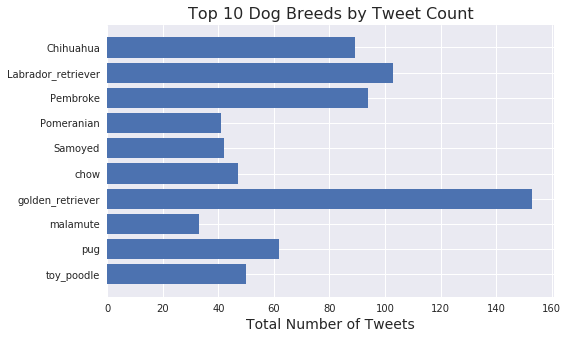

In [93]:
plt.barh(top10_breeds_count.index, top10_breeds)
plt.xlabel('Total Number of Tweets', fontsize = 14)
# plt.ylabel('Dog Breed', fontsize = 14)
plt.title('Top 10 Dog Breeds by Tweet Count', fontsize = 16)
plt.gca().invert_yaxis()
plt.show();

The bar chart above shows that the most common dog that is tweeted about, with almost 160 tweets, is the Golden Retriever. Labrador Retrievers, Pembrokes and Chihuahuas are in 2nd, 3rd, and 4th position respectively.

Multivariate Analysis
Relationship between favourite and retweet counts

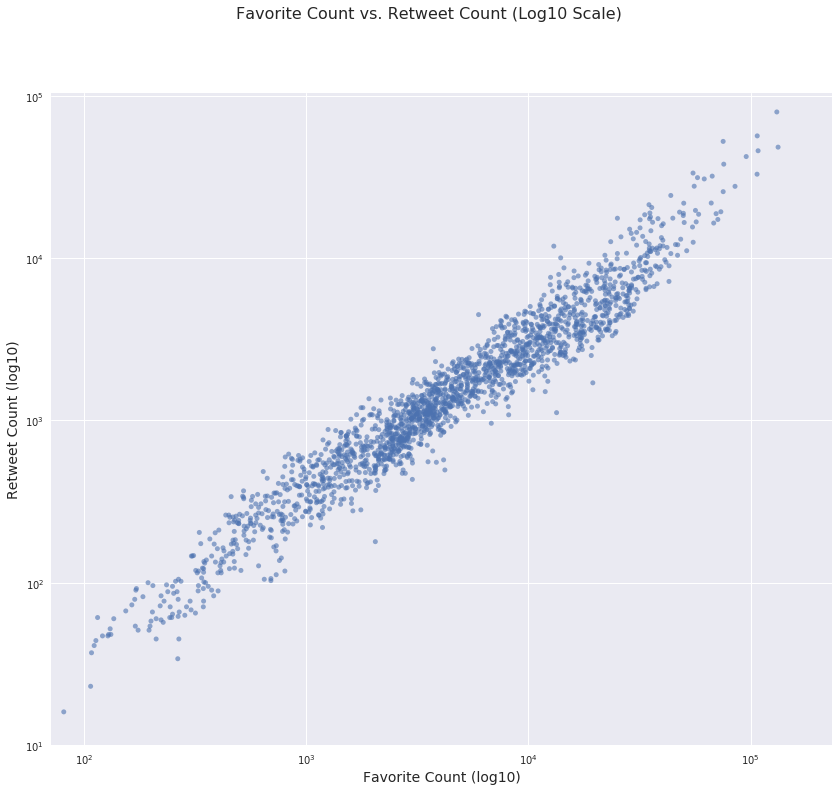

In [94]:
df = final_dogs_file

cmap = cm.get_cmap('Spectral') # Colour map (there are many others)
plt.figure(figsize = (14, 12))

plt.xscale('log')
plt.yscale('log')
plt.xlim(df['favorite_count'].min() - 10, df['favorite_count'].max() + 100000)
plt.ylim(10, df['retweet_count'].max() + 25000)
markers = 25

plt.scatter(df['favorite_count'], df['retweet_count'], s = markers, cmap = cmap, edgecolor = 'None', alpha = 0.6)

# title and labels
plt.suptitle('Favorite Count vs. Retweet Count (Log10 Scale)', fontsize = 16)
plt.xlabel('Favorite Count (log10)', fontsize = 14)
plt.ylabel('Retweet Count (log10)', fontsize = 14)



plt.show()

This plot is showing a strong positive correlation between retweet counts and favorite counts. It does make sense though, it is normal that if a person likes a tweet (favourite it), they are more likely to retweet it as well. The tightly packed points follow a clear linear trend line with a positive slope, so as favorite count increases so does the retweet count increase.